In [1]:
#Pkg.update("LowRankModels")
using LowRankModels, PyPlot, DataFrames

INFO: Recompiling stale cache file /Users/alexanderdowney/.julia/lib/v0.6/LowRankModels.ji for module LowRankModels.
INFO: Recompiling stale cache file /Users/alexanderdowney/.julia/lib/v0.6/LaTeXStrings.ji for module LaTeXStrings.
INFO: Recompiling stale cache file /Users/alexanderdowney/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


# Input the Data

In [6]:
y = readtable("/Users/alexanderdowney/Desktop/winedata.csv")[1]
X = convert(Array,readtable("/Users/alexanderdowney/Desktop/winedata.csv")[2:120])

129963×119 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0   3.0  0.135  0.865  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   0.0  0.142  0.858  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   2.0  0.03   0.97   0.0  
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   1.0  0.076  0.924  0.0  
 0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   5.0  0.177  0.823  0.0  
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0   0.0  0.07   0.93   0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   0.0  0.074  0.926  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   0.0  0.103  0.858  0.04 
 0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  1.0   4.0  0.266  0.734  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   0.0  0.089  0.911  0.0  
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0   4.0  0.078  0.922  0.0  
 0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  1.0   2.0  0.087  0.887  0.027
 1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0   5.0  0.177  0.823  0.

# Run some regressions

In [7]:
function prox_k_sparse_gradient_method(X, y ,w , alpha, iterations=100)
    
    obj_store = zeros(0)
    for i = 1:(iterations)
        z = w - alpha*2*(X'*X*w-X'y)
        w = prox_k_sparse(z,k)
        append!(obj_store,(norm(X*w-y)).^2)
    end
    
    return w,obj_store
end

prox_k_sparse_gradient_method (generic function with 2 methods)

In [12]:
function prox_k_sparse(z,k)
    
    set_to_zero_order = sortperm(abs.(z))
    d = length(z)
    w = z
    for i = 1:d-k
        w[set_to_zero_order[i]] = 0
    end
    
    return w
end

prox_k_sparse (generic function with 1 method)

In [8]:
Lipshitz = 2*maximum(svdvals(X)).^2

alpha = (1/Lipshitz)/4

6.66095457866377e-8

In [10]:
size(X)[2]

119

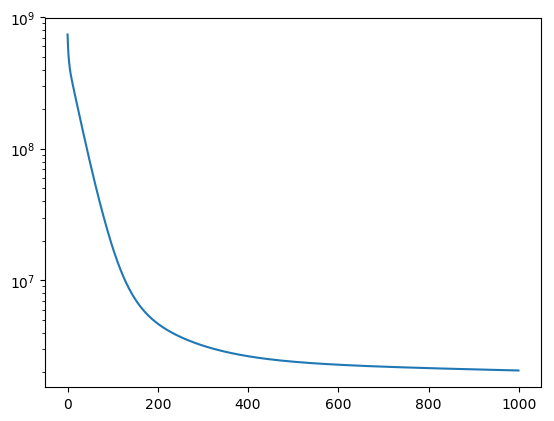

The minimum objective value is 2.0708090154028027e6

In [15]:
w_rand = randn(size(X)[2])
k = 50
w, obj_output = prox_k_sparse_gradient_method(X, y, w_rand, alpha, 1000)
semilogy(obj_output)
print("The minimum objective value is ",minimum(obj_output))

In [16]:
function stochastic_prox_grad_method(X, y ,w , alpha, iterations=100)
    alphai=alpha/8
    obj_store = zeros(0)
    for j = 1:(iterations)
        i = Integer(ceil(rand()*length(y)))
        yi = y[i]
        xi = X[i,:]
        z = w + alphai*(2*length(y)*((yi-w'*xi)*xi))
        w = prox_k_sparse(z,k)
        append!(obj_store,(norm(X*w-y)).^2)
    end
    
    return w,obj_store
end

stochastic_prox_grad_method (generic function with 2 methods)

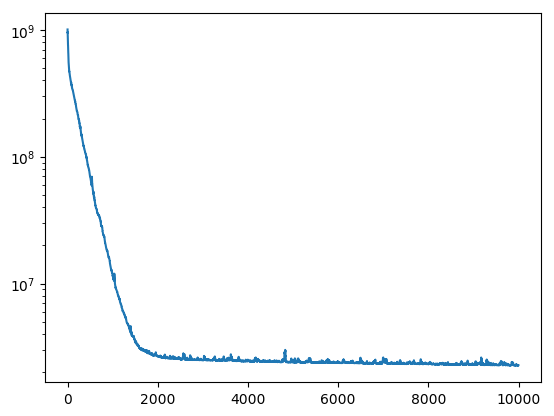

2.262677183278591e6

In [19]:
w_rand = randn(size(X)[2])
w,obj_output = stochastic_prox_grad_method(X, y, w_rand, alpha, 10000)

semilogy(obj_output)

print(minimum(obj_output))